In [26]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

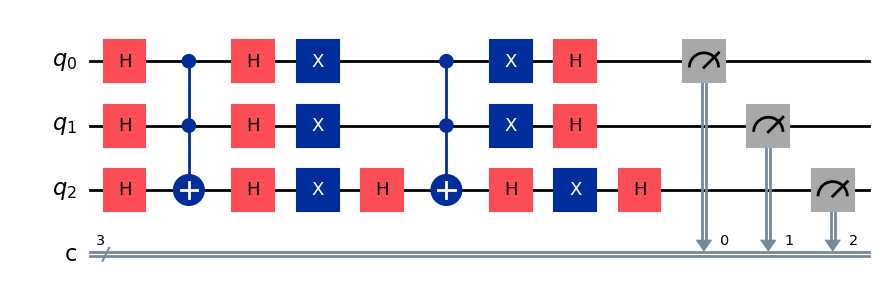

In [18]:
# Crear un circuito de 3 qubits y 3 bits clásicos
n = 3
grover_circuit = QuantumCircuit(n, n)

# Inicializar en superposición todos los estados |000>, |001>, |010>, |011>, |100>, |101>, |110>, |111>
grover_circuit.h([0, 1, 2])

# Oráculo para el estado |111>
grover_circuit.ccx(0, 1, 2)

# Grover Diffuser
grover_circuit.h([0, 1, 2])
grover_circuit.x([0, 1, 2])
grover_circuit.h(2)
grover_circuit.ccx(0, 1, 2)
grover_circuit.h(2)
grover_circuit.x([0, 1, 2])
grover_circuit.h([0, 1, 2])

# Medir los qubits
grover_circuit.measure([0, 1, 2], [0, 1, 2])

# Dibujar el circuito
grover_circuit.draw('mpl')

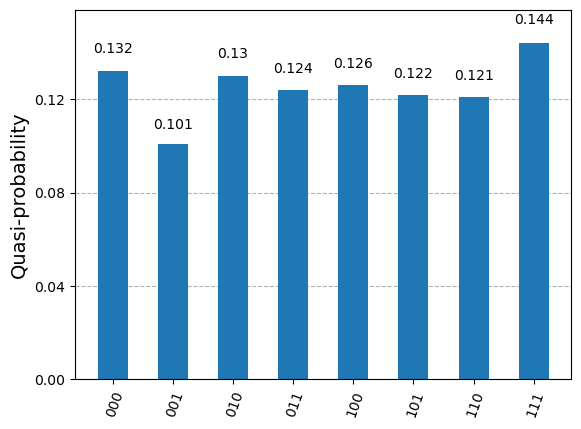

In [29]:
# Ejecutar el circuito en el simulador
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(grover_circuit, simulator)

# Definir el número máximo de ejecuciones
shots = 1000

# Ejecutar en el simulador y obtener los resultados
results = simulator.run(compiled_circuit, shots=shots).result()
answer = results.get_counts()

# Calcular probabilidades normalizadas
probabilities = {state: count / shots for state, count in answer.items()}

# Mostrar los resultados en probabilidades
plot_histogram(probabilities)
